In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
df = pd.read_csv('datasets/bdata.csv', low_memory=False, index_col='station_id' )
df

,longitude,latitude,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,MeanWaveDirection,Hmax,AirTemperature,DewPoint,SeaTemperature,RelativeHumidity,QC_Flag
station_id,,,,,,,,,,,,,,,,
NaN,degrees_east,degrees_north,UTC,mb,degrees_true,kn,kn,m,s,degrees_true,m,degree_C,degree_C,degree_C,percent,NaN
M1,-11.2,53.1266,2001-02-06T13:00:00Z,967.6,270.0,21.98,33.1,NaN,NaN,NaN,NaN,8.9,NaN,9.0,NaN,1.0
M1,-11.2,53.1266,2001-02-06T14:00:00Z,969.8,270.0,23.93,35.0,NaN,NaN,NaN,NaN,8.5,NaN,9.0,NaN,1.0
M1,-11.2,53.1266,2001-02-06T15:00:00Z,972.0,270.0,19.07,31.1,NaN,NaN,NaN,NaN,8.9,NaN,9.0,NaN,1.0
M1,-11.2,53.1266,2001-02-06T16:00:00Z,973.6,270.0,15.95,25.3,NaN,NaN,NaN,NaN,9.1,NaN,9.0,NaN,1.0
M1,-11.2,53.1266,2001-02-06T18:00:00Z,976.4,270.0,12.06,19.5,NaN,NaN,NaN,NaN,8.8,NaN,9.0,NaN,1.0
M1,-11.2,53.1266,2001-02-06T20:00:00Z,978.8,260.0,11.09,17.5,NaN,NaN,NaN,NaN,8.8,NaN,9.0,NaN,1.0
M1,-11.2,53.1266,2001-02-06T21:00:00Z,979.8,280.0,9.92,17.5,NaN,NaN,NaN,NaN,8.2,NaN,9.0,NaN,1.0
M1,-11.2,53.1266,2001-02-06T22:00:00Z,980.6,300.0,7.98,13.6,NaN,NaN,NaN,NaN,8.2,NaN,9.0,NaN,1.0


In [22]:
M3df= df.loc['M3',[ 'time','AtmosphericPressure' ,'WindDirection', 'WindSpeed', 'WaveHeight']]

In [26]:

M3df.to_csv('datasets/m3data.csv')



In [29]:
f = pd.read_csv('datasets/M3data.csv',low_memory= False)

M3_100.to_csv('datasets/m3_100data.csv')
M3_100

,station_id,time,AtmosphericPressure,WindDirection,WindSpeed,WaveHeight
1,M3,2002-07-22T15:00:00Z,1021.4,240.0,13.0,NaN
2,M3,2002-07-22T16:00:00Z,1021.2,250.0,14.0,NaN
3,M3,2002-07-22T17:00:00Z,1020.6,250.0,14.0,NaN
4,M3,2002-07-22T18:00:00Z,1020.0,230.0,12.0,NaN
5,M3,2002-07-22T19:00:00Z,1020.0,250.0,16.0,NaN
6,M3,2002-07-22T20:00:00Z,1019.2,240.0,17.0,NaN
7,M3,2002-07-22T21:00:00Z,1019.2,240.0,19.0,NaN
8,M3,2002-07-22T22:00:00Z,1018.2,230.0,20.0,NaN
9,M3,2002-07-22T23:00:00Z,1017.8,230.0,19.0,NaN
10,M3,2002-07-23T00:00:00Z,1017.2,240.0,21.0,NaN


In [37]:
df= pd.read_csv('datasets/M3_100data.csv', index_col="Unnamed: 0")
df
ran100=np.random.randint(low=1, high= 25000, size= 100)
l100= list(ran100)

 

ran_100= df.loc[l100,:]
ran_100.to_csv('datasets/ran_100data.csv')

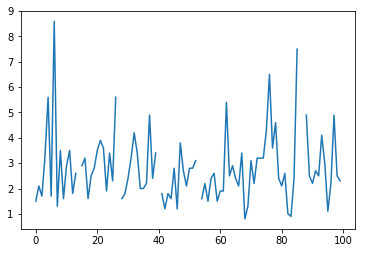

In [39]:
testdata= pd.read_csv('datasets/ran_100data.csv')
testdata['WaveHeight'].plot()
plt.show()

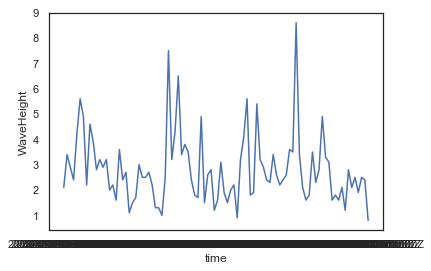

In [40]:
import seaborn as sns
sns.set(style="white")



sns.lineplot(x="time", y="WaveHeight",data=testdata)



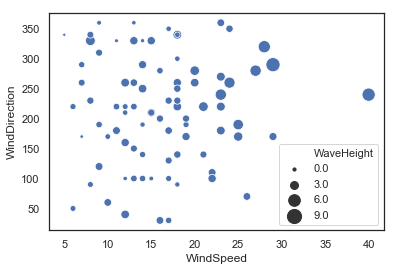

In [45]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="WindSpeed", y="WindDirection", size="WaveHeight",
                     palette=cmap, sizes=(10, 200),
                     data=testdata)

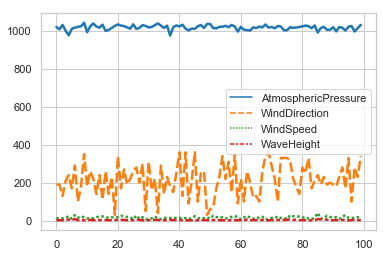

In [48]:
sns.set(style="whitegrid")



data = pd.DataFrame(testdata, columns=['AtmosphericPressure' ,'WindDirection', 'WindSpeed', 'WaveHeight'])


sns.lineplot(data=data, palette="tab10", linewidth=2.5)

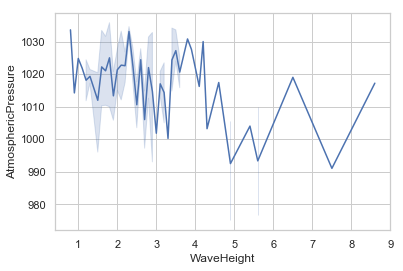

In [51]:
sns.lineplot(x="WaveHeight", y="AtmosphericPressure",
             data=testdata)